#  Explore Decision Tree Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

# Import Dataset

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
data.shape

(150, 6)

# correlation matrix

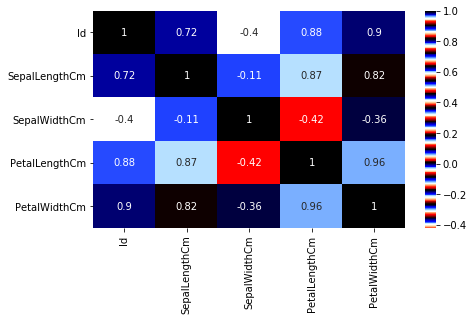

In [5]:
plt.figure(figsize=(7,4)) 
sns.heatmap(data.corr(),annot=True,cmap='flag') 
#draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Graph ploting

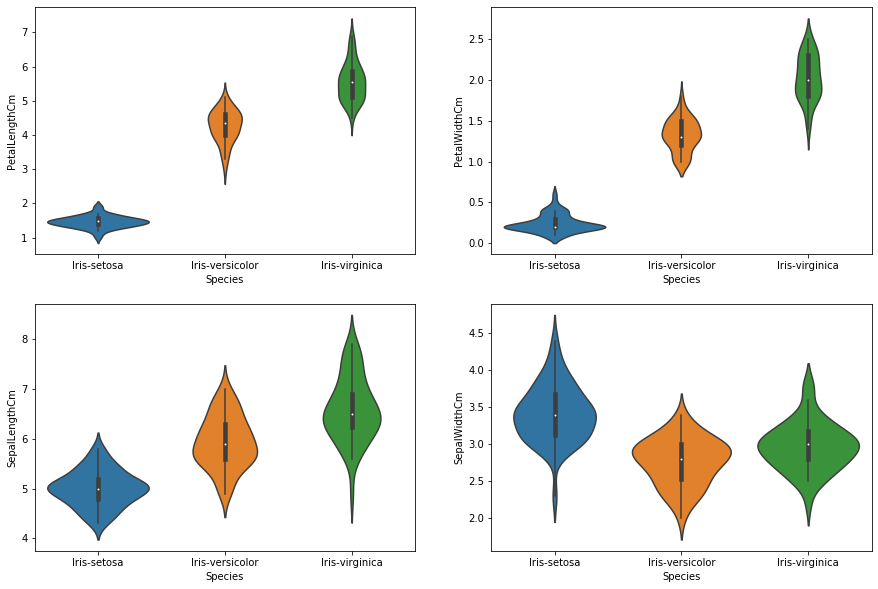

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

# Decision Tree Classifier

In [8]:
#separating dataset
# x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
# y = data['Species'].values
x = data.iloc[:,1:5].values
y = data.iloc[:,-1].values

In [9]:
# defining decision tree algorithm

classify = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classify.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# Train-Test-Split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

# Feature scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# training decision tree model on training data set

In [12]:
classify.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [13]:
# prediction of test results

y_pred = classify.predict(x_test)

# showing actual and predicted values

In [14]:
tr = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
tr.head()

,Actual,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa


In [15]:
tr.tail()

,Actual,Predicted
33,Iris-virginica,Iris-virginica
34,Iris-virginica,Iris-virginica
35,Iris-versicolor,Iris-versicolor
36,Iris-setosa,Iris-setosa
37,Iris-versicolor,Iris-virginica


# Accuracy of Decision Tree

In [16]:


a = accuracy_score(y_pred,y_test)
print(f'accuracy score for decision tree is : {a}')

accuracy score for decision tree is : 0.9736842105263158


# Visualizing the Decision Tree

In [25]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz


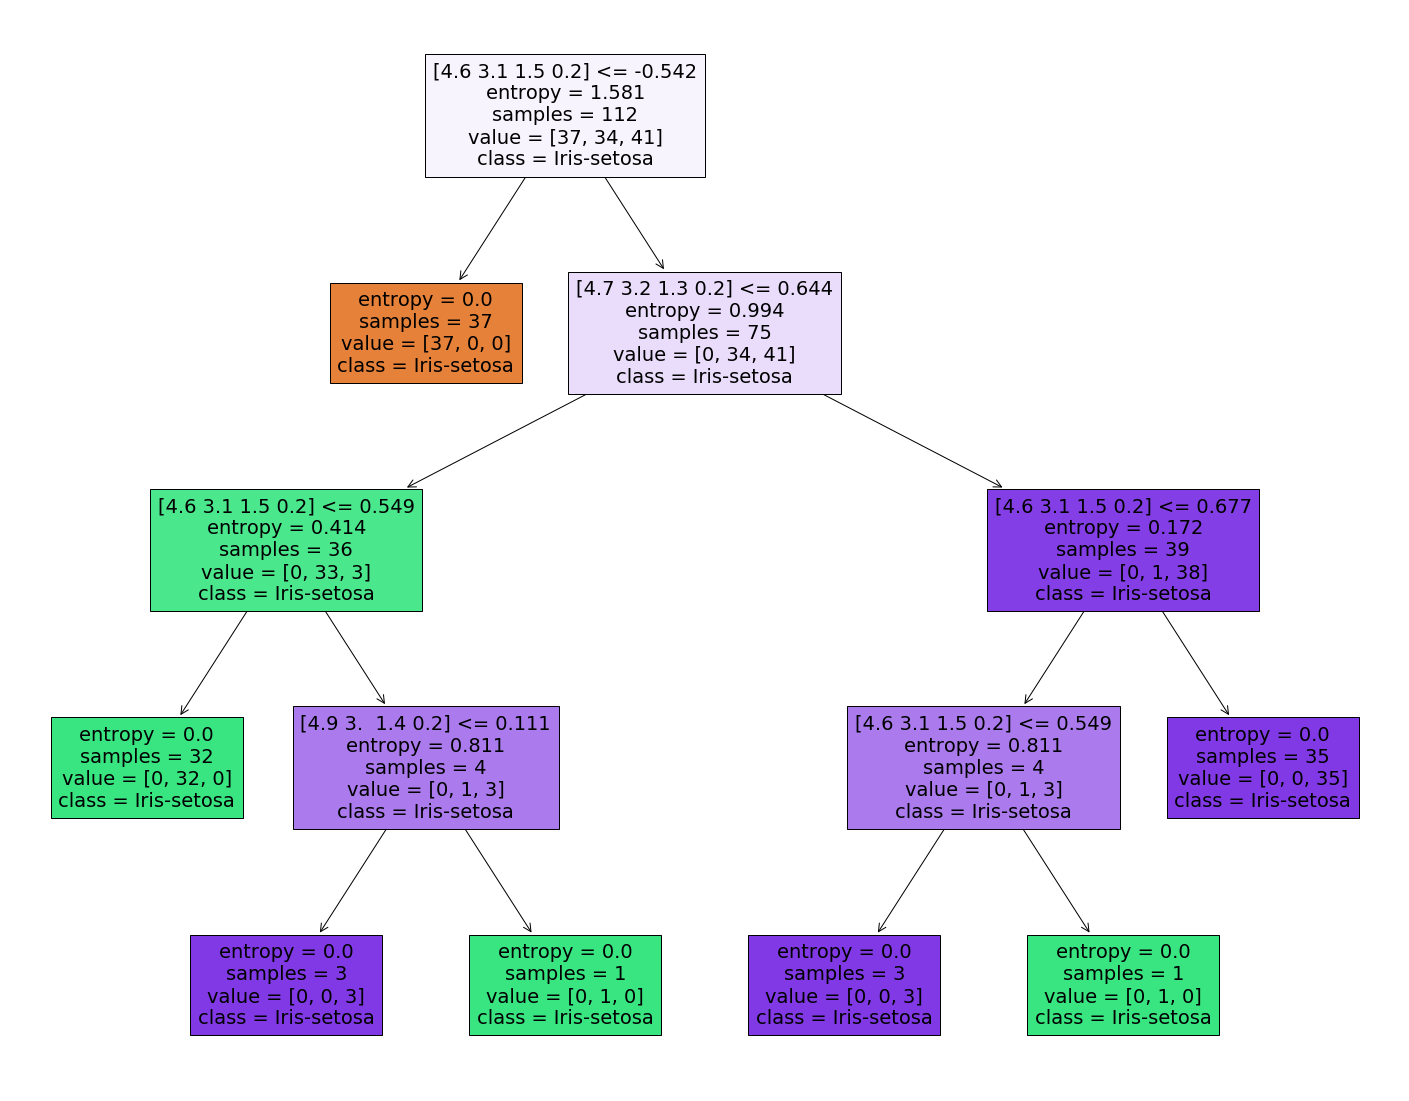

In [27]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classify, 
                   feature_names=x,  
                   class_names=y,
                   filled=True)

In [28]:
fig.savefig("decistion_tree.png")